In [ ]:
from __future__ import print_function

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
# Import MNIST data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("data/", one_hot=True)

In [ ]:
# In this example, we limit mnist data
oXtr, Ytr = mnist.train.next_batch(1000) #5000 for training (nn candidates)
oXte, Yte = mnist.test.next_batch(20) #200 for testing

Xtr = np.array(oXtr)
Xte = np.array(oXte)

In [18]:
translation = 2

Xtr = np.multiply(Xtr, translation)
Xte = np.multiply(Xte, translation)

# tf Graph Input
xtr = tf.placeholder("float", [None, 784])
xte = tf.placeholder("float", [784])

In [20]:
# Nearest Neighbor calculation using L1 Distance
# Calculate L1 Distance
distance = tf.reduce_sum(tf.abs(tf.add(xtr, tf.negative(xte))), reduction_indices=1)
# Prediction: Get min distance index (Nearest neighbor)
pred = tf.arg_min(distance, 0)

accuracy = 0.

init = tf.global_variables_initializer()

Test 0 Prediction: 1 True Class: 7


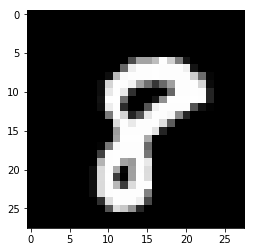

Test 1 Prediction: 1 True Class: 4


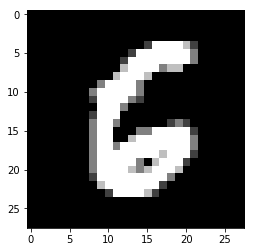

Test 2 Prediction: 1 True Class: 2


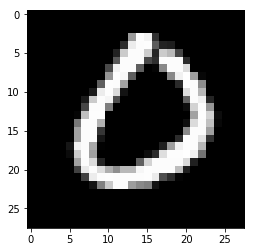

Test 3 Prediction: 1 True Class: 9


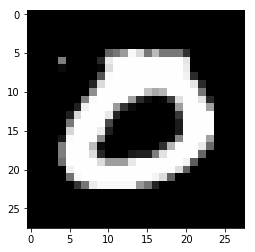

Test 4 Prediction: 1 True Class: 5


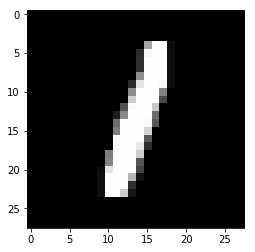

Test 5 Prediction: 1 True Class: 4


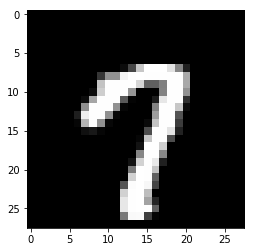

Test 6 Prediction: 1 True Class: 9


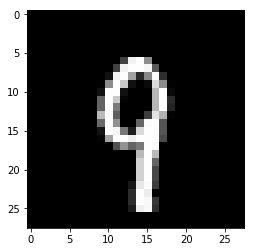

Test 7 Prediction: 1 True Class: 7


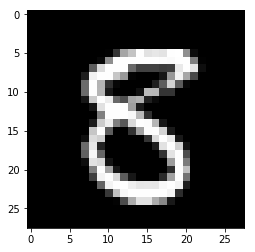

Test 8 Prediction: 1 True Class: 5


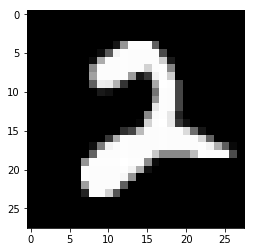

Test 9 Prediction: 1 True Class: 7


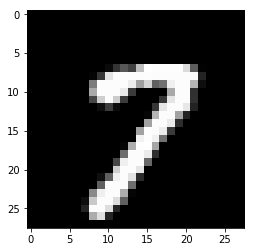

Test 10 Prediction: 1 True Class: 4


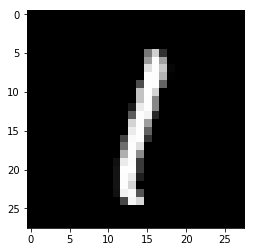

Test 11 Prediction: 1 True Class: 9


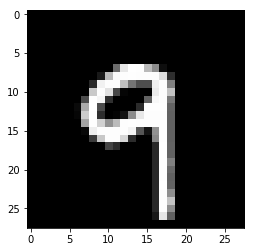

Test 12 Prediction: 1 True Class: 1


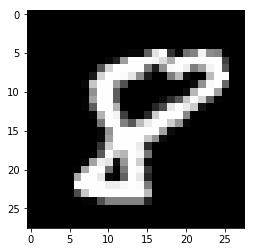

Test 13 Prediction: 1 True Class: 1


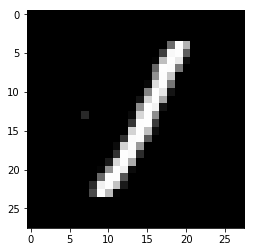

Test 14 Prediction: 1 True Class: 3


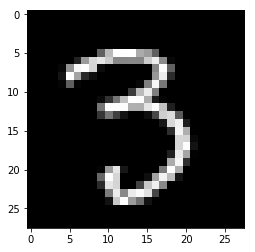

Test 15 Prediction: 1 True Class: 6


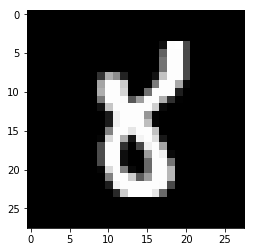

Test 16 Prediction: 1 True Class: 3


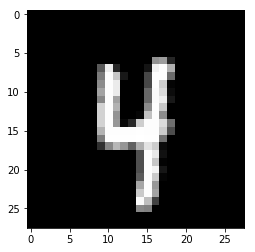

Test 17 Prediction: 1 True Class: 1


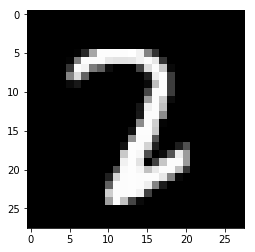

Test 18 Prediction: 1 True Class: 3


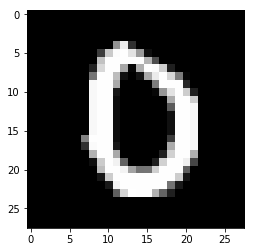

Test 19 Prediction: 1 True Class: 5


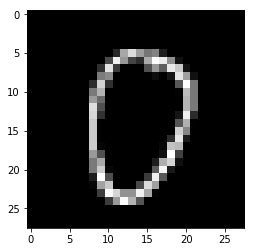

Done!
Accuracy: 0.15000000000000002


In [21]:
# Start training
with tf.Session() as sess:

    # Run the initializer
    sess.run(init)

    # loop over test data
    for i in range(len(Xte)):
        # Get nearest neighbor
        nn_index = sess.run(pred, feed_dict={xtr: Xtr, xte: Xte[i, :]})
        # Get nearest neighbor class label and compare it to its true label
        print("Test", i, "Prediction:", np .argmax(Ytr[nn_index]), \
            "True Class:", np.argmax(Yte[i]))
        plt.imshow(np.reshape(mnist.test.images[i], [28, 28]), cmap='gray')
        plt.show()
        # Calculate accuracy
        if np.argmax(Ytr[nn_index]) == np.argmax(Yte[i]):
            accuracy += 1./len(Xte)
        
    print("Done!")
    print("Accuracy:", accuracy)